# Setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import authentic_performance as ap
from scipy.stats import uniform, norm
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch, os
from sklearn.model_selection import train_test_split
import torch_geometric.utils as utils
from torch.utils.data import DataLoader
import torch_geometric as pyg
from torch_geometric.nn import GCNConv

In [3]:
def power_law(x, a=1):
    return (1/x)**a

# Analysis

In [24]:
l_fraud_probabilities = [round(x,2) for x in list(np.linspace(0,1,11))]

## 0 Ranking performance (fraud free network)

In [4]:
pd.read_csv('results/ranking_performance.csv')

,Unnamed: 0,kendall_tau_distance (mean),kendall_tau_distance (std),spearman_r (mean),spearman_r (std),kendall_tau
0,delta_degrees,699.8,44.072213,0.899773,0.015346,0.717253
1,f_alpha_t,683.4,75.526419,0.895609,0.026477,0.723879
2,MLP,619.6,34.840207,0.918014,0.009583,0.749657
3,MLP_neighbourhood,507.7,51.735964,0.942609,0.012219,0.794869
4,PageRank,619.2,52.558158,0.918101,0.014102,0.749818
5,GCN,761.4,90.699724,0.881806,0.027502,0.692364


## 1 Random network, dumb fraudster

In [20]:
results_path = os.path.join("results", "random_net_dumb_fraudster")
l_model = list(os.walk(results_path))[0][1]

### 1.1 Fraud sensitivity

f_alpha_t (11,)
gnn (11,)
delta_degrees (11,)
pagerank (11,)
mlp (11,)
mlp_neighbourhood_info (11,)


Text(0.5, 1.0, 'Fraud sensitivity')

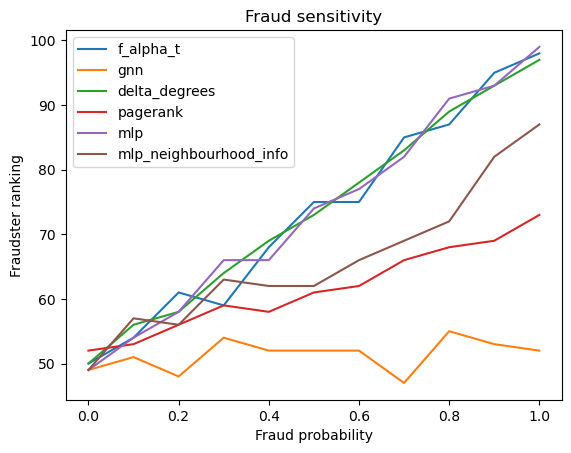

In [35]:
for model in l_model:
    a = np.load(os.path.join(results_path, model, "fraudster_rankings.npy"))
    print(model, a.shape)
    plt.plot(l_fraud_probabilities, a, label=model)

plt.legend()
plt.xlabel("Fraud probability")
plt.ylabel("Fraudster ranking")
plt.title("Fraud sensitivity")

### 1.2 Fraud detection

f_alpha_t (11, 100)
gnn (11, 100)
delta_degrees (11, 100)
pagerank (11, 100)
mlp (11, 100)
mlp_neighbourhood_info (11, 100)


Text(0.5, 1.0, 'Fraud detection')

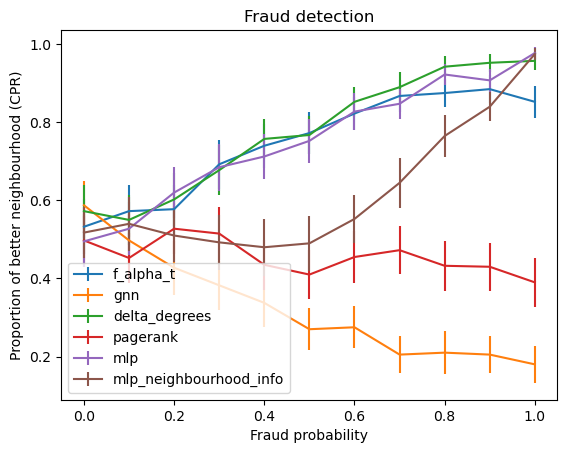

In [33]:
for model in l_model:
    a_fraudster = np.load(os.path.join(results_path, model, "fraudster_fraud_detection.npy"))
    print(model, a.shape)
    plt.errorbar(x=l_fraud_probabilities,
                y=np.mean(a_fraudster, axis=1),
                yerr=1.96*np.std(a_fraudster, axis=1)/np.sqrt(100),
                label=model)

plt.legend()
plt.xlabel("Fraud probability")
plt.ylabel("Proportion of better neighbourhood (CPR)")
plt.title("Fraud detection")

## 2 Random network, malicious fraudster

In [42]:
results_path = os.path.join("results", "random_net_malicious_fraudster")
l_model = list(os.walk(results_path))[0][1]

### 2.1 Fraud sensitivity

f_alpha_t (11,)
gnn (11,)
delta_degrees (11,)
pagerank (11,)
mlp (11,)
mlp_neighbourhood_info (11,)


Text(0.5, 1.0, 'Fraud sensitivity')

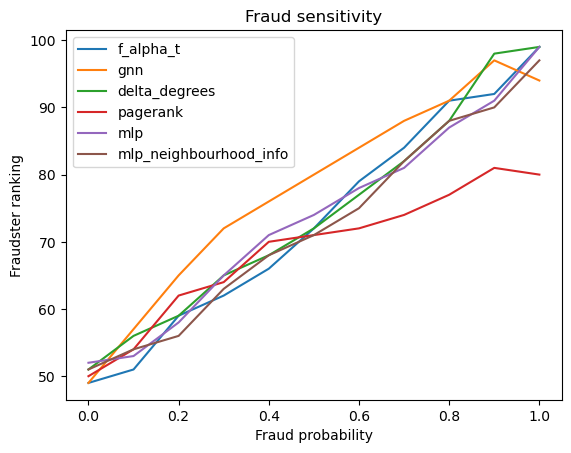

In [43]:
for model in l_model:
    a = np.load(os.path.join(results_path, model, "fraudster_rankings.npy"))
    print(model, a.shape)
    plt.plot(l_fraud_probabilities, a, label=model)

plt.legend()
plt.xlabel("Fraud probability")
plt.ylabel("Fraudster ranking")
plt.title("Fraud sensitivity")

### 2.2 Fraud detection

f_alpha_t (11,)
gnn (11,)
delta_degrees (11,)
pagerank (11,)
mlp (11,)
mlp_neighbourhood_info (11,)


Text(0.5, 1.0, 'Fraud detection')

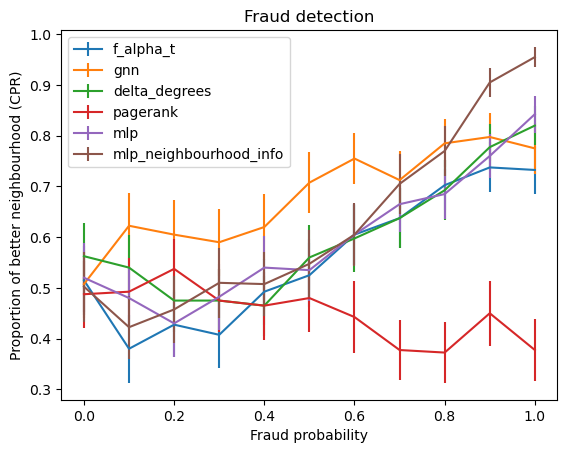

In [44]:
for model in l_model:
    a_fraudster = np.load(os.path.join(results_path, model, "fraudster_fraud_detection.npy"))
    print(model, a.shape)
    plt.errorbar(x=l_fraud_probabilities,
                y=np.mean(a_fraudster, axis=1),
                yerr=1.96*np.std(a_fraudster, axis=1)/np.sqrt(100),
                label=model)

plt.legend()
plt.xlabel("Fraud probability")
plt.ylabel("Proportion of better neighbourhood (CPR)")
plt.title("Fraud detection")

# <>